In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
df=pd.read_csv("train_data.csv")

df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [86]:
df.shape


(614, 13)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [88]:
pd.crosstab(df['Credit_History'],df['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [89]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [90]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df.LoanAmount=df.LoanAmount.fillna(df.LoanAmount.mean())
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)


In [91]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [92]:
df.drop('Loan_ID',axis=1,inplace=True)


In [93]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


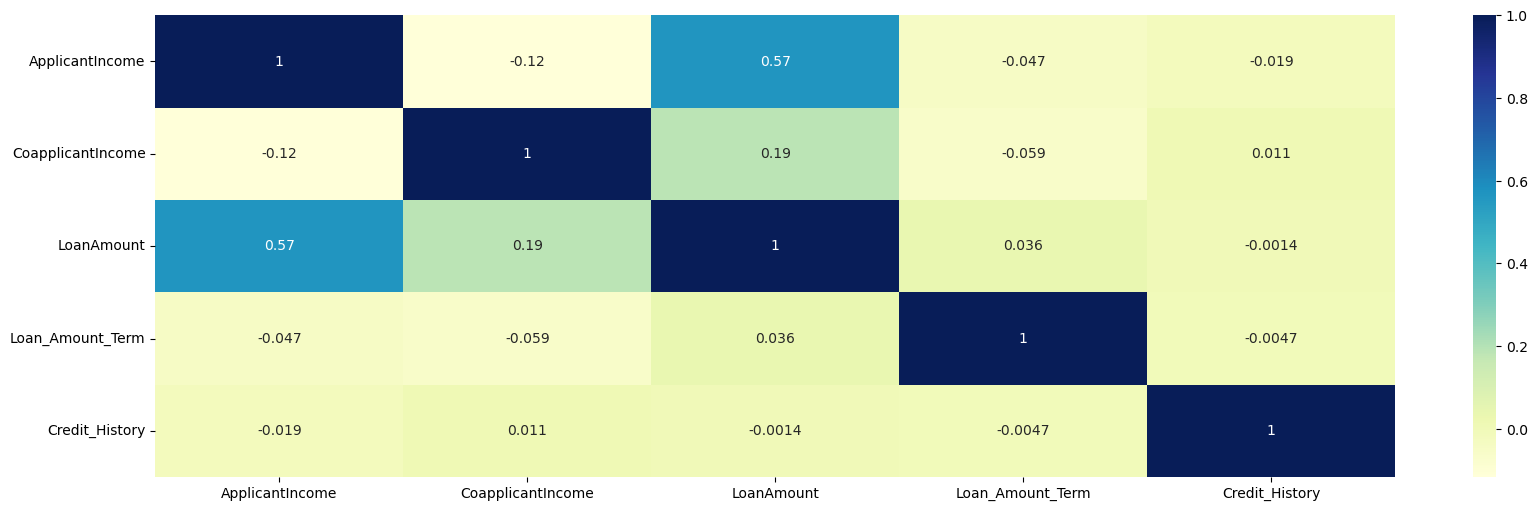

In [94]:
plt.figure(figsize=(20,6))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()


In [95]:
cat_cols=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


In [96]:
for i in cat_cols:
    print(i)
    print('Train set:',sorted(df[i].unique()))
   

Gender
Train set: ['Female', 'Male']
Married
Train set: ['No', 'Yes']
Dependents
Train set: ['0', '1', '2', '3+']
Education
Train set: ['Graduate', 'Not Graduate']
Self_Employed
Train set: ['No', 'Yes']
Property_Area
Train set: ['Rural', 'Semiurban', 'Urban']


In [97]:
from sklearn.preprocessing import LabelEncoder
features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Loan_Status']
label_encoder = LabelEncoder()

for col in features:
    df[col] = label_encoder.fit_transform(df[col])

In [98]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [99]:
df.iloc[7]

Gender                  1.0
Married                 1.0
Dependents              3.0
Education               0.0
Self_Employed           0.0
ApplicantIncome      3036.0
CoapplicantIncome    2504.0
LoanAmount            158.0
Loan_Amount_Term      360.0
Credit_History          0.0
Property_Area           1.0
Loan_Status             0.0
Name: 7, dtype: float64

In [100]:
df.iloc[8]

Gender                  1.0
Married                 1.0
Dependents              2.0
Education               0.0
Self_Employed           0.0
ApplicantIncome      4006.0
CoapplicantIncome    1526.0
LoanAmount            168.0
Loan_Amount_Term      360.0
Credit_History          1.0
Property_Area           2.0
Loan_Status             1.0
Name: 8, dtype: float64

In [101]:
round(df.Loan_Status.value_counts()/df.shape[0]*100,2)

1    68.73
0    31.27
Name: Loan_Status, dtype: float64

In [102]:
X=df.drop('Loan_Status',axis=1)
Y=df.Loan_Status

In [103]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [104]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X , Y = smote.fit_resample(X , Y)

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [106]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
325,1,1,1,0,1,8666,4983.000000,376.000000,360.0,0.000000,0
694,0,0,0,0,0,2567,1903.260249,114.065062,360.0,0.000000,1
498,1,1,1,0,1,2895,0.000000,95.000000,360.0,1.000000,1
139,1,1,2,1,0,4200,1430.000000,129.000000,360.0,1.000000,0
823,1,1,2,0,0,2927,1673.540808,142.632811,360.0,0.737767,1


In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
logit=LogisticRegression()
logit.fit(X_train,Y_train)
print(logit)
Y_pred_logit=logit.predict(X_test)
f1_logit=f1_score(Y_test,Y_pred_logit)*100
print(f1_logit)

LogisticRegression()
74.26470588235293


c:\Users\SADHIK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
rf=RandomForestClassifier(random_state=42,n_estimators=150,max_depth=4)
rf.fit(X_train,Y_train)
print(rf)

Y_pred=rf.predict(X_test)
f1_rf=f1_score(Y_test,Y_pred)*100
print(f1_rf)

RandomForestClassifier(max_depth=4, n_estimators=150, random_state=42)
84.35374149659864


In [109]:
import pickle
with open('loan_application.pkl','wb') as f:
    pickle.dump(rf,f)

In [110]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

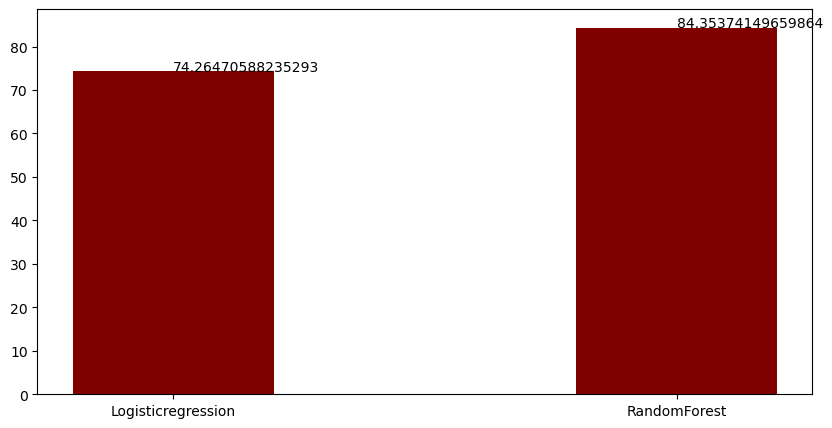

In [111]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
fig = plt.figure(figsize = (10, 5))

a=['Logisticregression','RandomForest']
b=[f1_logit,f1_rf]
# creating the bar plot
plt.bar(a,b, color ='maroon',
        width = 0.4)
addlabels(a,b)
plt.show()
 

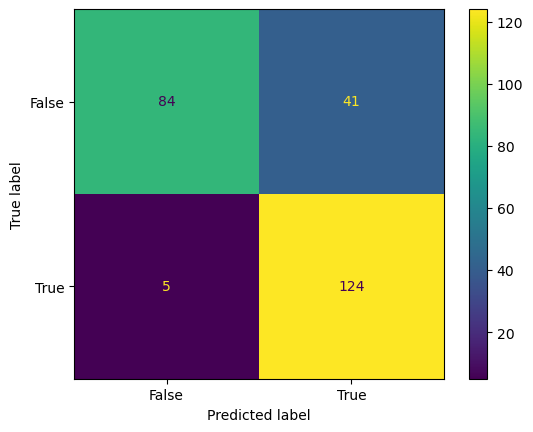

In [112]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()